In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("countries of the world.csv")
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

preprocessing data 

In [4]:
# precentage of null
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [5]:
# drop columns that have more than 5% null value
df.drop(["Literacy (%)","Climate","Agriculture","Industry","Service"],axis=1)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"3,2","12,13","0,22","87,65","46,6","20,34"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"71,2","21,09","4,42","74,49","15,11","5,22"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"78,1","3,22","0,25","96,53","17,14","4,61"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"259,5",10,15,75,"22,46","3,27"
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"497,2","2,22",0,"97,78","8,71","6,25"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,"145,2","16,9","18,97","64,13","31,67","3,92"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,"0,02",0,"99,98",NaN,NaN
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"37,2","2,78","0,24","96,98","42,89","8,3"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"8,2","7,08","0,03","92,9",41,"19,93"


In [6]:
df = df.replace(",",".",regex=True)
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.6,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10,15,75,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.0,497.2,2.22,0,97.78,3,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.9,18.97,64.13,3,31.67,3.92,0.09,0.28,0.63
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0,99.98,1,NaN,NaN,NaN,NaN,0.4
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0,61.5,800.0,50.2,37.2,2.78,0.24,96.98,1,42.89,8.3,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0,88.29,800.0,80.6,8.2,7.08,0.03,92.9,2,41,19.93,0.22,0.29,0.489


In [7]:
# fill nan value with median 
df=df.fillna(df.median())

In [8]:
# to ensure that not contain any non value
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [9]:
# label encoder to convert string to numerical 
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df["Country"]=label_encoder.fit_transform(df["Country"])
df["Region"]=label_encoder.fit_transform(df["Region"])

In [10]:
from sklearn import preprocessing 
#normalization
from sklearn import preprocessing
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
df_scale= pd.DataFrame(x_scaled)
df_scale.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.0,0.023631,0.037920,0.002950,0.000000,1.000000,0.851138,0.003663,0.223301,0.002897,0.195299,0.004341,0.814759,0.000000,0.904926,0.657559,0.494148,0.248307,0.356502
1,0.004425,0.3,0.002720,0.001683,0.007658,0.001447,0.364586,0.101800,0.073260,0.836165,0.068573,0.339559,0.087214,0.617369,0.666667,0.180018,0.106740,0.301691,0.189616,0.579596
2,0.008850,0.6,0.025056,0.139485,0.000848,0.000046,0.467650,0.151985,0.100733,0.635922,0.075237,0.051844,0.004933,0.947953,0.000000,0.226750,0.084517,0.131339,0.654628,0.264574
3,0.013274,0.8,0.000039,0.000012,0.017847,0.066949,0.006356,0.036951,0.137363,0.963592,0.250435,0.161005,0.295975,0.625019,0.333333,0.349217,0.035701,0.128739,0.284424,0.570628
4,0.017699,1.0,0.000049,0.000027,0.009348,0.000000,0.626334,0.009317,0.338828,1.000000,0.480008,0.035743,0.000000,0.966702,0.666667,0.032689,0.144262,0.128739,0.284424,0.570628


In [23]:
from sklearn.decomposition import PCA
pca=PCA().fit(df_scale)
pca.explained_variance_ratio_

array([3.01354733e-01, 1.64012919e-01, 1.34032195e-01, 1.10816799e-01,
       5.98449357e-02, 4.47222647e-02, 4.16416494e-02, 2.46081284e-02,
       2.23026698e-02, 2.13776410e-02, 1.70673385e-02, 1.51983267e-02,
       1.12939221e-02, 1.02994070e-02, 6.28968588e-03, 6.14208158e-03,
       5.33767108e-03, 3.41808698e-03, 2.31837512e-04, 7.70678718e-06])

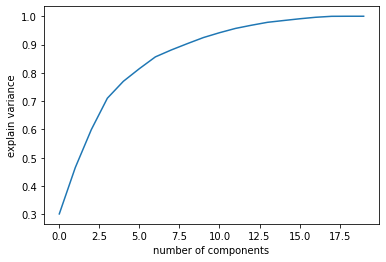

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("explain variance")
plt.show()

In [14]:
pca = PCA(n_components = 2)
pca_=pca.fit_transform(df_scale)
pca_df = pd.DataFrame(pca.transform(df_scale),columns=(["col1","col2"]))
pca_df

,col1,col2
0,1.068325,0.503827
1,-0.165107,0.357850
2,0.216115,0.025753
3,-0.124987,-0.101291
4,-0.439258,-0.580649
...,...,...
222,-0.053753,0.208837
223,0.093058,-0.082008
224,0.714028,0.082904
225,0.665573,-0.305189


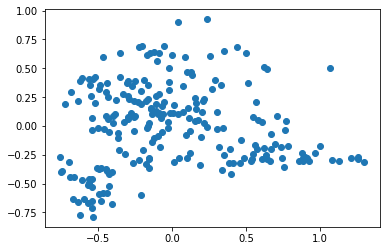

In [15]:
#scatter
plt.scatter(x=pca_df["col1"],y=pca_df["col2"])

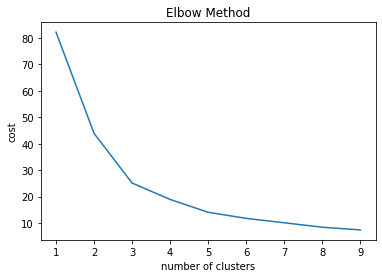

In [ ]:
#Kmeans 

from sklearn.cluster import KMeans
cost_fun=[]
k_range=range(1,10)
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    cost_fun.append(kmeans.inertia_)

plt.plot(k_range,cost_fun)
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("cost")
plt.show()

In [ ]:
#Silhouette method for test the best accuarcy

acc=[]
for n_clusters in range(2,10):
    clusterer = kmeans = KMeans(n_clusters =n_clusters , init = 'k-means++',random_state = 0)
    cluster_labels = clusterer.fit_predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print("num_clusters =", n_clusters,"silhouette_score is =", silhouette_avg)
    acc.append(silhouette_avg)
accuracy=max(acc)
print("\n best accuracy is : ",accuracy)

num_clusters = 2 silhouette_score is = 0.4357098283007199
num_clusters = 3 silhouette_score is = 0.4545697837006559
num_clusters = 4 silhouette_score is = 0.4189698374568693
num_clusters = 5 silhouette_score is = 0.43771583419554305
num_clusters = 6 silhouette_score is = 0.4146212817664145
num_clusters = 7 silhouette_score is = 0.4050515502746429
num_clusters = 8 silhouette_score is = 0.4160547221635611
num_clusters = 9 silhouette_score is = 0.4107716464834249

 best accuracy is :  0.4545697837006559


In [ ]:
#kmeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 0)
labels = kmeans.fit_predict(pca_df)
labels

array([1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1,
       2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       2, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0,
       1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0,
       2, 1, 0, 0, 1, 1, 1], dtype=int32)

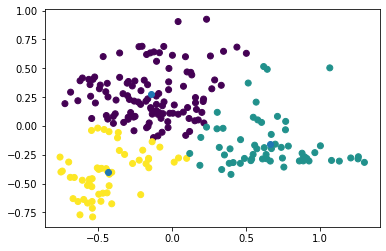

In [ ]:
#plot the scatter kmean 
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1],c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1])

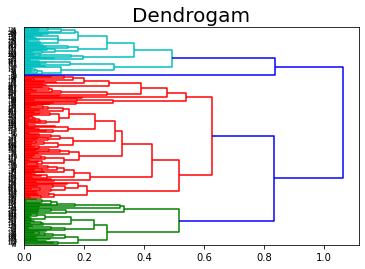

In [ ]:
#dendrogram

import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage (pca_df ,method = "average", metric='euclidean'),orientation='right')
plt.title('Dendrogam', fontsize = 20)
plt.show()

In [ ]:
#Silhouette method for test the best accuracy 

from sklearn.cluster import AgglomerativeClustering
acc=[]
for n_clusters in range(2,10):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
    cluster_labels = clusterer.fit_predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print("num_clusters =", n_clusters,"silhouette_score =", silhouette_avg)
    acc.append(silhouette_avg)
accuracy=max(acc)
print("\n best accuracy is : ",accuracy)

num_clusters = 2 silhouette_score = 0.4540975125019048
num_clusters = 3 silhouette_score = 0.4165959573708187
num_clusters = 4 silhouette_score = 0.4233396837021837
num_clusters = 5 silhouette_score = 0.39452262305218316
num_clusters = 6 silhouette_score = 0.3732790915873929
num_clusters = 7 silhouette_score = 0.3469265355165885
num_clusters = 8 silhouette_score = 0.349280856412495
num_clusters = 9 silhouette_score = 0.3610798313910458

 best accuracy is :  0.4540975125019048


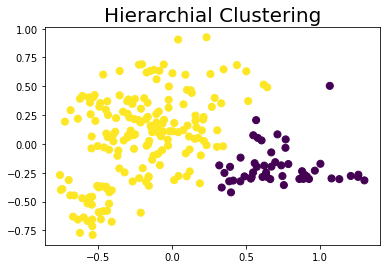

In [ ]:
#Hierarchial Clustering

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')
cluster_labels = model.fit_predict(pca_df)
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], s = 50, c = cluster_labels)
plt.title('Hierarchial Clustering', fontsize = 20)
plt.show()

In [ ]:
# GMM
gmm = GaussianMixture(n_components=2 , covariance_type='full')
gmm.fit(pca_df)
cluster_gmm = gmm.predict(pca_df)

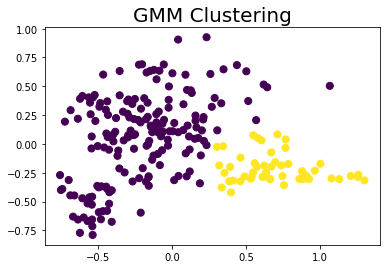

In [ ]:
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], s = 50, c = cluster_gmm)
plt.title('GMM Clustering', fontsize = 20)
plt.show()

In [ ]:
#silhouette test for the best accuracy '
from sklearn.mixture import GaussianMixture
acc=[]
for i in range(2,10):
    clusterer = GaussianMixture(n_components=i , covariance_type='full')
    clusterer.fit(pca_df)
    labels = clusterer.predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, labels)
    print("num_clusters =", i,"silhouette=", silhouette_avg)
    acc.append(silhouette_avg)
accuracy=max(acc)
print("\n best accuracy is : ",accuracy)

num_clusters = 2 silhouette= 0.4306845216922733
num_clusters = 3 silhouette= 0.383125405619738
num_clusters = 4 silhouette= 0.36618822324889333
num_clusters = 5 silhouette= 0.41813893308888145
num_clusters = 6 silhouette= 0.3447682863731702
num_clusters = 7 silhouette= 0.31281765460702915
num_clusters = 8 silhouette= 0.29258872380703793
num_clusters = 9 silhouette= 0.33429767031266394

 best accuracy is :  0.4306845216922733


In [ ]:
#DBSCAN
db_scan = DBSCAN(eps = 0.3, min_samples = 20).fit(pca_df)
labels = db_scan.labels_

In [ ]:
labels

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

Text(0.5, 1.0, 'DBSCAN')

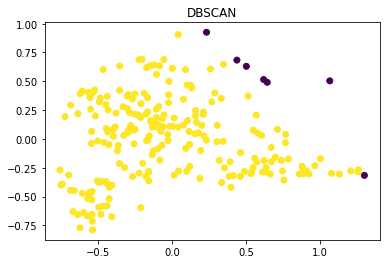

In [ ]:
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=labels)
plt.title("DBSCAN")

In [ ]:
# silhouette method for the best accuarcy 
from sklearn.metrics import silhouette_score , silhouette_samples
silhouette_avg = silhouette_score(pca_df,labels)
each_silhouette_score = silhouette_samples(pca_df,labels,metric="euclidean")
print("silhouette=",silhouette_avg)

silhouette= 0.2889995749390703


best kmean hierachial
